In [91]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf

# Task 1 - AR(p) models

Text(0, 0.5, 'value')

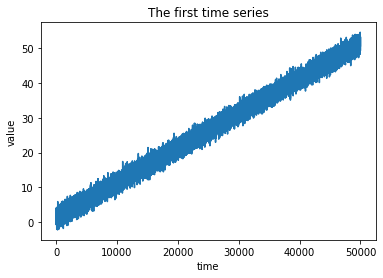

In [13]:
data = np.loadtxt('Tut2_file1.txt')

plt.plot(data)
plt.title('The first time series')
plt.xlabel('time')
plt.ylabel('value')

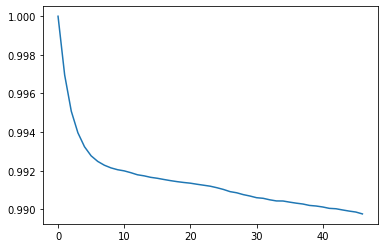

In [95]:
plt.plot(acf(data))

## Task 1.1

In [100]:
# Linear regression
def regress(time_series):
    linear = lambda x, a_0, a_1: a_0 + a_1 * x
    
    return curve_fit(linear, range(len(time_series)), time_series)

# Calculate the parameters of an AR(1) model
def calk_a(time_series):
    # calculate a_0
    
    
    # calculate a_1
    
    
    return [a_0, a_1]

In [130]:
# implementation of a AR(1) model
def AR(a, time_series, N):
    # a: the parameters of the model, time_series: the prior/known terms of the time_series, N: the number of additional values to predict
    
    result = np.zeros(N)
    result[0] = a[0] + a[1] * time_series[-1] #+ np.random.normal(0, 1, 1)
    
    for n in range(1,N):
        result[n] = a[0] + a[1] * result[n-1] #+ np.random.normal(0, 1, 1)
        
    return result

In [131]:
regress(data)

(array([1.24528351e+00, 1.00007021e-03]),
 array([[ 1.25766212e-04, -3.77302434e-09],
        [-3.77302434e-09,  1.50923997e-13]]))

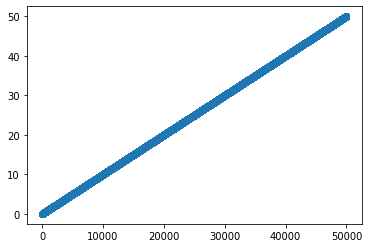

In [137]:
plt.scatter(range(50000), AR([0.001, 1], [0], 50000))

## Task 1.2

In [113]:
popt, pcov = regress(data)

data_stat = data - popt[1] * np.arange(len(data))

In [115]:
regress(data_stat)

(array([ 1.24528351e+00, -2.00328643e-12]),
 array([[ 1.17840551e-04, -3.46360686e-09],
        [-3.46360686e-09,  1.38852344e-13]]))

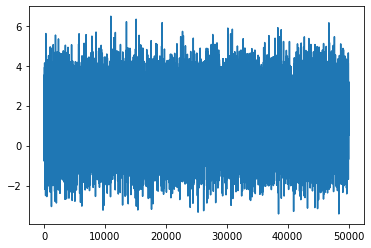

In [116]:
plt.plot(data_stat)

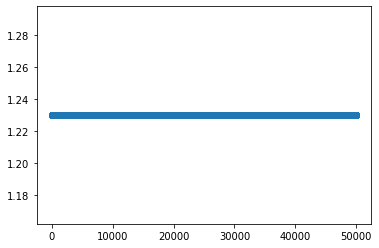

In [135]:
plt.scatter(range(50000), AR([1.23,0.], [0], 50000))

# Task 2 - Estimating an AR(1) model

In [140]:
data = np.loadtxt('Tut2_file2.txt')
data

array([-4.117096  , -1.54256415, -2.66228088, ...,  3.96486679,
        4.71864488,  2.58622357])

Text(0.5, 1.0, 'The second time series')

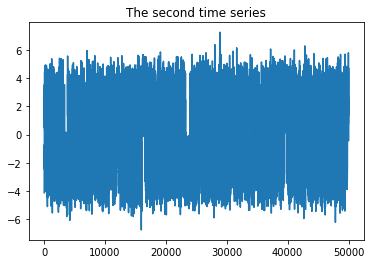

In [148]:
plt.plot(data)
plt.title('The second time series')

Text(0.5, 1.0, 'The first 500 point of the second time series')

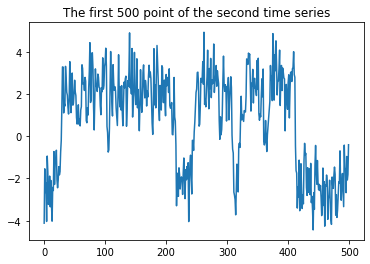

In [149]:
plt.plot(data[:500])
plt.title('The first 500 point of the second time series')

Text(0.5, 1.0, 'The first return plot of the second time series')

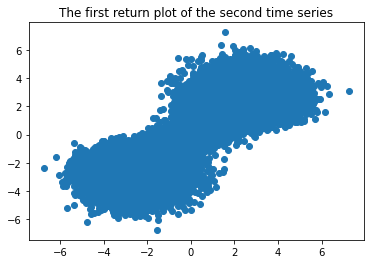

In [152]:
plt.scatter(data[1:], data[:-1])
plt.title('The first return plot of the second time series')

Text(0.5, 1.0, 'The autocorrelation function of the second time series')

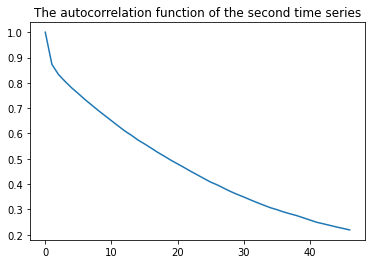

In [153]:
plt.plot(acf(data))
plt.title('The autocorrelation function of the second time series')

# Task 3 - Autocorrelation and partial autocorrelation

In [161]:
data_AR, data_MA = np.loadtxt('Tut2_file3.txt', skiprows=1).T

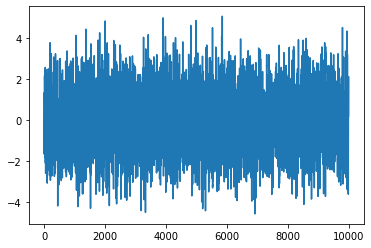

In [162]:
plt.plot(data_AR)

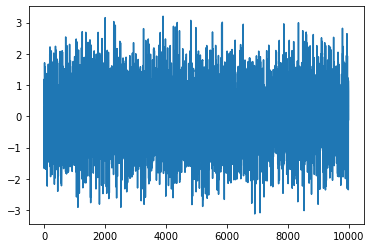

In [164]:
plt.plot(data_MA)

In [179]:
def autocorrelation(x):
    N = len(x)
    result = np.zeros(int(N/3))
    for dt in range(int(N/3)):
        result[dt] = np.mean((x[dt:] - np.mean(x[dt:])) * (x[:N-dt] - np.mean(x[:N-dt]))) / (np.std(x[dt:]) * np.std(x[:N-dt]))
    
    return result

def partial_autocorrelation(x):
    N = len(x)
    result = np.zeros(int(N/3))
    for dt in range(int(N/3)):
        result[dt] = 0
        
    return result

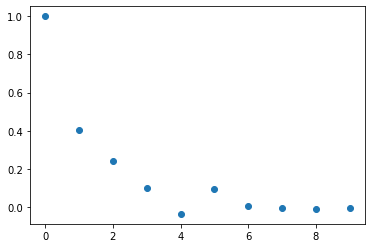

In [183]:
N = 10
plt.scatter(range(N), autocorrelation(data_MA)[:N])

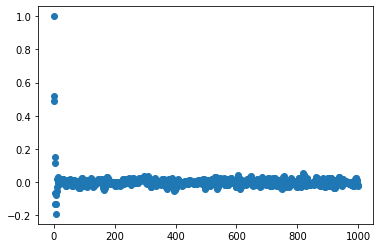

In [187]:
N = 1000
plt.scatter(range(N), autocorrelation(data_AR)[:N])